In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
plt.style.use('tableau-colorblind10')
from IPython.display import display
%matplotlib inline

In [3]:

data= pd.read_csv('combined_ifluence_ratio.csv',low_memory=False )

In [4]:
display(data.head())
# data.head()

,user_id,stat_co,fave_co,friend_co,follow_co,retw_co,ftf_ratio,log_ftf,tweet_freq,utw_ratio,log_utw,Influence Ratio
0,5HWorldCom,136496,2800,2,68719,2815,34359.500000,4.536059,1.0,5615.0,3.749350,17.007274
1,corbett,23782,20388,2,13031,287,6515.500000,3.814014,1.0,20675.0,4.315446,16.459171
2,harryfear,79458,7130,2,33249,33,16624.500000,4.220775,1.0,7163.0,3.855095,16.271487
3,NoMalice757,14912,5584,2,42620,7,21310.000000,4.328604,1.0,5591.0,3.747489,16.221397
4,dbongino,56240,56134,650,1345845,373,2070.530769,3.316291,1.0,56507.0,4.752102,15.759356


#### EDA

In [5]:
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147756 entries, 0 to 147755
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          147756 non-null  object 
 1   stat_co          147756 non-null  int64  
 2   fave_co          147756 non-null  int64  
 3   friend_co        147756 non-null  int64  
 4   follow_co        147756 non-null  int64  
 5   retw_co          147756 non-null  int64  
 6   ftf_ratio        147756 non-null  float64
 7   log_ftf          147756 non-null  float64
 8   tweet_freq       147756 non-null  float64
 9   utw_ratio        147756 non-null  float64
 10  log_utw          147756 non-null  float64
 11  Influence Ratio  147756 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 13.5+ MB


,stat_co,fave_co,friend_co,follow_co,retw_co,ftf_ratio,log_ftf,tweet_freq,utw_ratio,log_utw,Influence Ratio
count,1.477560e+05,1.477560e+05,147756.000000,1.477560e+05,147756.000000,147756.000000,147756.000000,147756.000000,1.477560e+05,147756.000000,147756.000000
mean,4.291334e+04,3.715719e+04,1802.487026,5.268294e+03,13433.118513,8.791745,2.576114,1.373936,4.488883e+04,4.211452,1.333877
std,7.378609e+04,6.223451e+04,5913.259932,1.693847e+05,29236.027880,612.794678,563.322415,1.331349,6.542935e+04,0.777814,1.156707
min,1.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.006984,1.428571e-01,-0.845098,-0.938824
25%,5.913750e+03,4.056000e+03,302.000000,2.110000e+02,12.000000,0.431937,0.157087,1.000000,6.705000e+03,3.826399,0.618834
50%,1.855900e+04,1.519900e+04,661.000000,5.560000e+02,836.000000,0.870481,0.276947,1.000000,2.182100e+04,4.338875,1.129715
75%,4.948750e+04,4.345800e+04,1660.000000,1.597250e+03,11679.000000,1.344700,0.393056,1.000000,5.477600e+04,4.738590,1.637378
max,3.413584e+06,1.498512e+06,848619.000000,4.388326e+07,134300.000000,189355.535700,206864.131100,85.000000,1.614746e+06,6.208104,20.368562


<AxesSubplot:>

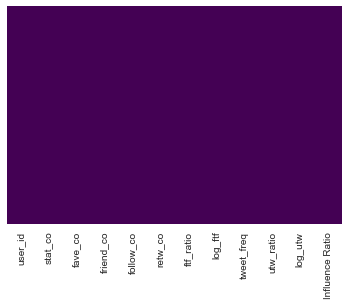

In [6]:
# Visualize missing values

sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [7]:
data.columns

Index(['user_id', 'stat_co', 'fave_co', 'friend_co', 'follow_co', 'retw_co',
       'ftf_ratio', 'log_ftf', 'tweet_freq', 'utw_ratio', 'log_utw',
       'Influence Ratio'],
      dtype='object')

In [8]:
# data.corr()

###### Visualize Correlations

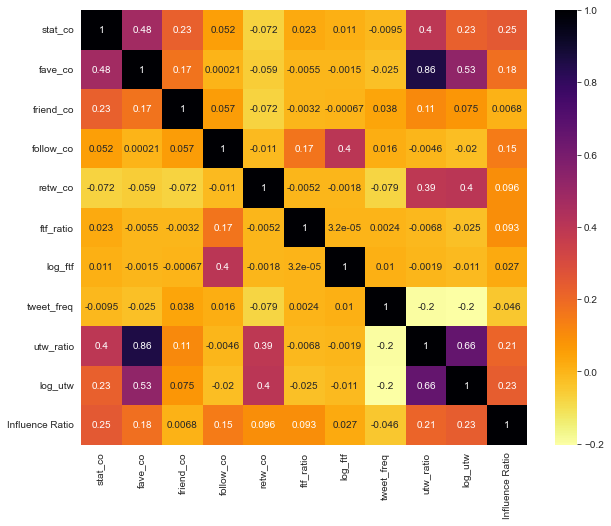

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='inferno_r', annot=True, )
plt.savefig('correlation_user_metric.png')

 Fav_Count & User Term Weight (UTW) seem to be highly correlated.

#### Pre-Processing 
We'll need to scale our data so that each feature has a single unit variance.

In [10]:
# Preprocessing
# first we need to scale these numbers to avoid iregularity

from sklearn.preprocessing import StandardScaler

We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

In [11]:
scaler = StandardScaler()

# We dropped ftf & utw ratios because we are going to use their logs (log_utw & log_ftf)
x = data.drop(['user_id', 'ftf_ratio','utw_ratio'], axis=1)
scaler.fit(x)
scale_df = scaler.transform(x)

In [12]:
display(f'DF shape: {scale_df.shape}')
scale_df

'DF shape: (147756, 9)'

array([[ 1.26830098, -0.552062  , -0.30448401, ..., -0.28087078,
        -0.59410541, 13.55006119],
       [-0.25928201, -0.26945255, -0.30448401, ..., -0.28087078,
         0.13370067, 13.07621253],
       [ 0.49528007, -0.48248622, -0.30448401, ..., -0.28087078,
        -0.45815316, 12.91395475],
       ...,
       [ 2.49752051, -0.59705327, -0.28774192, ...,  2.14759034,
        -5.41449055, -1.15317168],
       [ 2.86417621, -0.59705327, -0.26677203, ..., -0.63449668,
        -5.41449055, -1.15317168],
       [ 5.38116309, -0.59705327, -0.30330023, ...,  0.49028164,
        -5.80151246, -1.68060897]])

# PCA  #

[Question: would t-SNE would be more fitting than PCA in this case?]

NOTE: I dont know if PCA is neccessary in this case since we do not have many features, but I still go ahead to do it, just incase

In [13]:
from sklearn.decomposition import PCA

In [14]:
# 4 was chosen at random ....
# [Question: is there a good criteria to selecting PCA #]

pca = PCA(n_components=4)

In [15]:
pca = pca.fit(scale_df)
# display(pca)

In [16]:
# transform this data into its principal components
i_pca = pca.transform(scale_df)

In [17]:
# check shape
i_pca.shape

# scale_df.shape

(147756, 4)

In [18]:
# type(i_pca)
i_pca

array([[ 4.56705022,  1.98442379,  1.86949576,  4.36003266],
       [ 4.19197359,  1.33206471,  2.24433806,  4.15842137],
       [ 4.0673573 ,  1.6634036 ,  1.91165289,  4.1085652 ],
       ...,
       [-2.03659514,  8.51577516,  0.3359308 ,  1.11045921],
       [-2.29282276,  1.67626076, -2.30949636, -1.01629329],
       [-1.66325688,  2.35048764, -3.60153622, -0.19229795]])

###### Corresponding the PrincComps with original features

In [19]:
pca.components_

array([[ 0.46510066,  0.54193984,  0.20878448,  0.07833117,  0.15939576,
         0.0337798 , -0.13208935,  0.5279683 ,  0.34279681],
       [ 0.15636391,  0.00244612,  0.18607268,  0.61886754, -0.32111543,
         0.57592553,  0.21247121, -0.25944554,  0.1032614 ],
       [-0.32169837, -0.23207094, -0.36001322,  0.32368178,  0.56109212,
         0.35616627, -0.2804215 ,  0.24866849,  0.16162552],
       [ 0.0127427 , -0.03069376, -0.18383702, -0.02640719,  0.29931942,
        -0.12431517,  0.86151255,  0.00784955,  0.34218455]])

In [20]:
x.columns

Index(['stat_co', 'fave_co', 'friend_co', 'follow_co', 'retw_co', 'log_ftf',
       'tweet_freq', 'log_utw', 'Influence Ratio'],
      dtype='object')

In [21]:
df2 = pd.DataFrame(pca.components_, columns=x.columns)

In [22]:
df2

,stat_co,fave_co,friend_co,follow_co,retw_co,log_ftf,tweet_freq,log_utw,Influence Ratio
0,0.465101,0.541940,0.208784,0.078331,0.159396,0.033780,-0.132089,0.527968,0.342797
1,0.156364,0.002446,0.186073,0.618868,-0.321115,0.575926,0.212471,-0.259446,0.103261
2,-0.321698,-0.232071,-0.360013,0.323682,0.561092,0.356166,-0.280421,0.248668,0.161626
3,0.012743,-0.030694,-0.183837,-0.026407,0.299319,-0.124315,0.861513,0.007850,0.342185


##### The strength of the correlations can be better seen with heatmap plotting

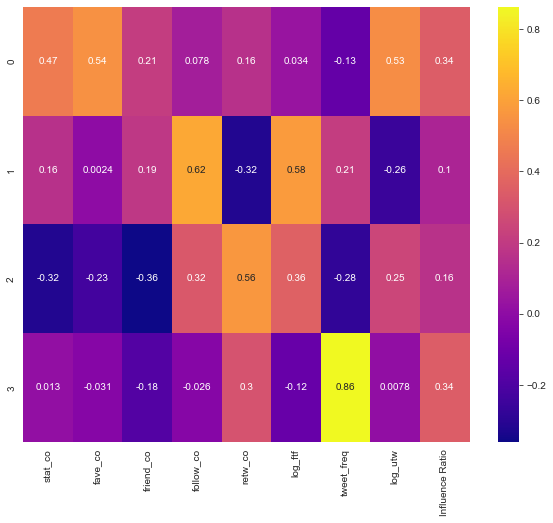

In [23]:
plt.figure(figsize=(10,8))

sns.heatmap(df2,cmap='plasma', annot=True)
plt.savefig("PCA Heatmap.png")

PCs: `PC_0`: Log_utw, fave_co; `PC_1`: follow_co, log_ftf; `PC_2`: retw_co; `PC_3`: tweet_freq

##### Use K-Means method to Cluster users

In [24]:
from sklearn.cluster import KMeans

###### Optimal n_cluster #
Using the Within-Cluster Sum of Square (Elbow method) to search for optimal K-Value

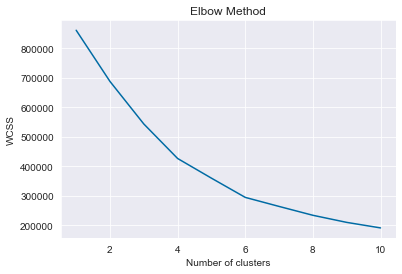

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=50)
    kmeans.fit(i_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig("Elbow_Method.png")
plt.show()


I determined 4 to be the ideal/optimum value of clusters


In [26]:
kmeans = KMeans(n_clusters=4)

In [27]:
kmeans.fit(i_pca)

KMeans(n_clusters=4)

In [28]:
kmeans.labels_

array([0, 3, 3, ..., 1, 1, 1], dtype=int32)

In [29]:
centroids=kmeans.cluster_centers_
kmeans.cluster_centers_

array([[ 2.50363992e+00,  3.23467212e-01, -8.64629606e-01,
        -1.12328980e-01],
       [-5.32957864e-01,  8.38635261e-02, -1.08902591e-01,
        -8.50665259e-02],
       [ 1.81174308e+01,  1.70034119e+02,  9.37213664e+01,
        -1.61893948e+01],
       [ 9.92467339e-01, -1.26419087e+00,  2.19980683e+00,
         9.17296692e-01]])

###### Visualize the clusters

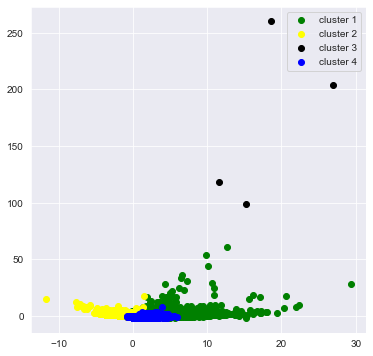

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))

X = plt.scatter(i_pca[kmeans.labels_ == 0, 0], i_pca[kmeans.labels_ == 0, 1],
               c='green', label='cluster 1')
Y = plt.scatter(i_pca[kmeans.labels_ == 1, 0], i_pca[kmeans.labels_ == 1, 1],
            c='yellow', label='cluster 2')
Z = plt.scatter(i_pca[kmeans.labels_ == 2, 0], i_pca[kmeans.labels_ == 2, 1],
            c='black', label='cluster 3')
G= plt.scatter(i_pca[kmeans.labels_ == 3, 0], i_pca[kmeans.labels_ == 3, 1],
            c='blue', label='cluster 4')

plt.legend()

In [31]:
# Alternatively

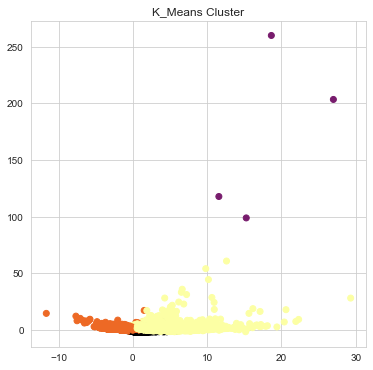

In [32]:
plt.figure(figsize=(6,6))
sns.set_style(style='whitegrid')
plt.title('K_Means Cluster')
plt.scatter(i_pca[:,0], i_pca[:,1], c=kmeans.labels_,cmap='inferno_r')
plt.savefig('final_clusters.png')
# plt.legend(labels=kmeans.labels_)


##### 3D Plotting

In [ ]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig, rect=[1, 1, 0.5, 0.6], elev=18, azim=34, auto_add_to_figure=False) 
fig.add_axes(ax)
kmeans.fit(i_pca)
labels = kmeans.labels_

ax.scatter3D(i_pca[:, 2], i_pca[:, 1],i_pca[:,0],
           c=kmeans.labels_.astype(np.float64), cmap='plasma', marker='.')


In [ ]:
# visualizing the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='centroid')

#### Predicting Cluster Classes


In [ ]:
y_pred = kmeans.fit_predict(x)

In [ ]:
# len(y_pred)
y_pred

In [ ]:
# creating a new dataframe
final_df = x

In [ ]:
# adding the label as a columns to dataframe

final_df['label'] = y_pred

In [ ]:
final_df

In [ ]:
final_df['label'].value_counts()

In [ ]:
# Import original data
orig= pd.read_csv('charlottsville_cleaned.csv', low_memory=False)
orig.head()

In [ ]:
# Add user names from initial data

final_df[['username','tweet']]= orig[['user','full_text']]

In [ ]:
final_df.label.value_counts()

In [ ]:
final_df.head()

##### Create new Dataframes for each label categories

In [ ]:
cat_2 = final_df[final_df['label'] == 2]
# cat_2

In [ ]:
cat_0 = final_df[final_df['label'] == 0]
# cat_0

In [ ]:
cat_1 =final_df[final_df['label'] == 1]
# cat_1

In [ ]:
cat_3 =final_df[final_df['label'] == 3]
# cat_3

In [ ]:
# Create a function to grab the usernames in each label category and their Tweets and write same to a csv file for further 
# qualitative analysis

def user_tweet(x,y,filename=""):
#     count = 0
    file_dict = {}
    user_list = []
    tweet_list= []
    
    for i in x:
        user_list.append(i)
        
    for k in y:
        tweet_list.append(k)
        
    file_dict['users'] = user_list
    file_dict['message'] = tweet_list
    
    
    
    csv_data = pd.DataFrame(file_dict)
    
#     Write dataframe to file
    wrt_file =csv_data.to_csv(filename +'.csv', header=True)
        
    print("File has been written to cwd as '{}.csv'".format(filename))
        
#     return csv_data
        
    

In [ ]:
user_tweet(cat_2['username'], cat_2['tweet'],"cat_2")

In [ ]:
user_tweet(cat_0['username'], cat_0['tweet'],"cat_0")

In [ ]:
user_tweet(cat_1['username'], cat_1['tweet'],"cat_1")

In [ ]:
user_tweet(cat_3['username'], cat_3['tweet'],"cat_3")

In [ ]:
sns.countplot(x=final_df['label'])

In [ ]:
# export Label List to file

lst =final_df['label']
lab_df = pd.DataFrame(lst)
# lab_df
# Write to file for export
lab_df.to_csv("label.csv", header=True)


##### Clusterting Score/Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
si_score = silhouette_score(x, y_pred)